<a href="https://colab.research.google.com/github/somilasthana/deeplearningtutorial/blob/master/Training_Basic_Tensorflow_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train your first neural network: basic classification

In [0]:
from __future__ import absolute_import, division, print_function

In [0]:
import tensorflow as tf
from tensorflow import keras

In [4]:
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.13.1


In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

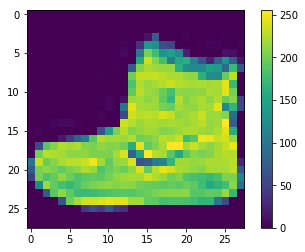

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images , test_images = train_images / 255.0 , test_images / 255.0

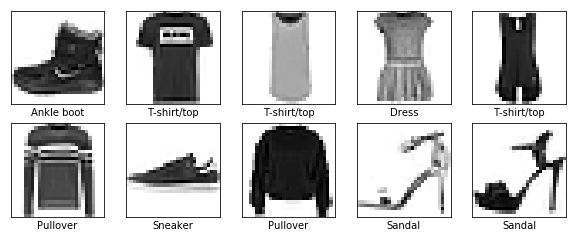

In [10]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
model = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(28, 28)), 
    #transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels
    
    keras.layers.Dense(128, activation=tf.nn.relu), 
    #These are densely-connected, or fully-connected, neural layers. 
    
    keras.layers.Dense(10, activation=tf.nn.softmax) 
    #The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1
    
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile( 
    
    optimizer = 'adam',
    #Optimizer —This is how the model is updated based on the data it sees and its loss function.
    
    loss = 'sparse_categorical_crossentropy',
    #Loss function —This measures how accurate the model is during training. 
    #We want to minimize this function to "steer" the model in the right direction.
    
    metrics = ['accuracy']
    #Metrics —Used to monitor the training and testing steps. The following example 
    # uses accuracy, the fraction of the images that are correctly classified.

)

In [14]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 125us/sample - loss: 0.5024 - acc: 0.8234
Epoch 2/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3764 - acc: 0.8638
Epoch 3/5
60000/60000 [==============================] - 7s 116us/sample - loss: 0.3369 - acc: 0.8782
Epoch 4/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.3120 - acc: 0.8858
Epoch 5/5
60000/60000 [==============================] - 8s 138us/sample - loss: 0.2959 - acc: 0.8912


In [15]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test Accuracy', test_accuracy)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.3471 - acc: 0.8751
Test Accuracy 0.8751


In [16]:
predictions = model.predict(test_images)
predictions[0]

array([1.2687352e-06, 2.1275594e-07, 3.0894977e-08, 3.4774055e-07,
       2.0450170e-06, 1.6946344e-02, 3.8005858e-06, 5.7576229e-03,
       3.4327636e-06, 9.7728491e-01], dtype=float32)

In [19]:
np.argmax(predictions[0]), test_labels[0]

(9, 9)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

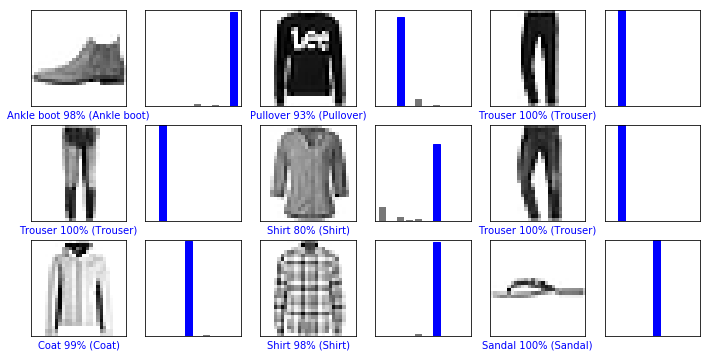

In [21]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()